<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/random_forest_regression_3_eurusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
#using eurusd, change to your preferred asset
eu = pd.read_csv('EURUSD1440.csv')
eu.tail(2)

,1971.01.04,00:00,0.53690,0.53690.1,0.53690.2,0.53690.3,1
12769,2021.11.16,00:00,1.13672,1.13855,1.13090,1.13189,91550
12770,2021.11.17,00:00,1.13208,1.13321,1.12635,1.13217,84391


In [2]:
eu.columns=['Date','Time','eu_Open','eu_High','eu_Low','eu_Close','Volume']
#Use D1 at least 2000 observations, change below for the number of rows you have.
#session crash or slow computing time may require you to use less rows. 
eu = eu.iloc[-2000:] 
#eu = eu.iloc[-3000:] 
eu = eu.reset_index(drop=True)
eu['Index']=eu.index
eu.set_index('Index', drop=True, append=False, inplace=True, verify_integrity=False)
#and make index a feature
eu.reset_index(inplace=True)
#drop last rows if needed
#eu = eu[:-1]
print(eu.head())
print(eu.tail())

   Index        Date   Time  eu_Open  eu_High   eu_Low  eu_Close  Volume
0      0  2014.03.04  00:00  1.37362  1.37812  1.37206   1.37395   33906
1      1  2014.03.05  00:00  1.37396  1.37491  1.37072   1.37361   31330
2      2  2014.03.06  00:00  1.37361  1.38723  1.37210   1.38596   36137
3      3  2014.03.07  00:00  1.38599  1.39146  1.38522   1.38746   46032
4      4  2014.03.10  00:00  1.38761  1.38976  1.38614   1.38769   47580
      Index        Date   Time  eu_Open  eu_High   eu_Low  eu_Close  Volume
1995   1995  2021.11.11  00:00  1.14769  1.14874  1.14429   1.14488   67531
1996   1996  2021.11.12  00:00  1.14468  1.14620  1.14327   1.14428   70130
1997   1997  2021.11.15  00:00  1.14470  1.14638  1.13561   1.13666   80978
1998   1998  2021.11.16  00:00  1.13672  1.13855  1.13090   1.13189   91550
1999   1999  2021.11.17  00:00  1.13208  1.13321  1.12635   1.13217   84391


In [3]:
eu['eu_High_next_day'] = eu['eu_High'].shift(-1)
eu['eu_Low_next_day'] = eu['eu_Low'].shift(-1)
eu['eu_Close_next_day'] = eu['eu_Close'].shift(-1)
eu = eu.dropna()
eu

,Index,Date,Time,eu_Open,eu_High,eu_Low,eu_Close,Volume,eu_High_next_day,eu_Low_next_day,eu_Close_next_day
0,0,2014.03.04,00:00,1.37362,1.37812,1.37206,1.37395,33906,1.37491,1.37072,1.37361
1,1,2014.03.05,00:00,1.37396,1.37491,1.37072,1.37361,31330,1.38723,1.37210,1.38596
2,2,2014.03.06,00:00,1.37361,1.38723,1.37210,1.38596,36137,1.39146,1.38522,1.38746
3,3,2014.03.07,00:00,1.38599,1.39146,1.38522,1.38746,46032,1.38976,1.38614,1.38769
4,4,2014.03.10,00:00,1.38761,1.38976,1.38614,1.38769,47580,1.38784,1.38335,1.38545
...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,2021.11.10,00:00,1.15915,1.15952,1.14759,1.14764,109854,1.14874,1.14429,1.14488
1995,1995,2021.11.11,00:00,1.14769,1.14874,1.14429,1.14488,67531,1.14620,1.14327,1.14428
1996,1996,2021.11.12,00:00,1.14468,1.14620,1.14327,1.14428,70130,1.14638,1.13561,1.13666
1997,1997,2021.11.15,00:00,1.14470,1.14638,1.13561,1.13666,80978,1.13855,1.13090,1.13189


In [4]:
#You must run prediction before 0GMT in order to get...

In [5]:
#for close prediction
#select rows to use for x,y
x = eu.iloc[:,[6]].values
print(x)
y = eu.iloc[:,[10]].values
print(y)

[[1.37395]
 [1.37361]
 [1.38596]
 ...
 [1.14428]
 [1.13666]
 [1.13189]]
[[1.37361]
 [1.38596]
 [1.38746]
 ...
 [1.13666]
 [1.13189]
 [1.13217]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [7]:
#for close prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 4000, n_jobs=-1, criterion='mse',random_state=1)
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=4000, n_jobs=-1,
                      random_state=1)

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,y_pred)

In [10]:
#for regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)


MAE: 0.004924565317761688
MSE: 4.403475289358524e-05
RMSE: 0.0066358686615683735
MAPE: 6.552250076257407


In [11]:
#Add current close price into np.array()

In [12]:
#for close prediction
y_pred_c = regressor.predict(np.array(1.13246).reshape(1, 1)) # test the output by changing values
y_pred_c

array([1.13238274])

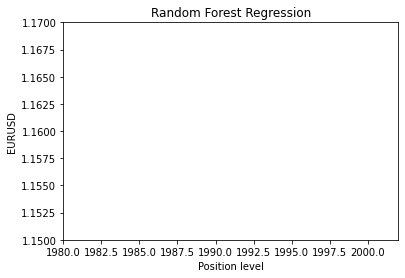

In [13]:
#for close prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(1980,2002)
plt.ylim(1.15,1.17)
plt.show()


In [14]:
#for low prediction
#select rows to use for x,y
x = eu.iloc[:,[5]].values
print(x)
y = eu.iloc[:,[9]].values
print(y)

[[1.37206]
 [1.37072]
 [1.3721 ]
 ...
 [1.14327]
 [1.13561]
 [1.1309 ]]
[[1.37072]
 [1.3721 ]
 [1.38522]
 ...
 [1.13561]
 [1.1309 ]
 [1.12635]]


In [15]:
#for low prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [16]:
#for low prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 4000, n_jobs=-1, criterion='mse',random_state=2)
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=4000, n_jobs=-1,
                      random_state=2)

In [17]:
#for low pred 
y_pred = regressor.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [18]:
#for low pred regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape)

MAE: 0.004525844938750117
MSE: 3.652210445252079e-05
RMSE: 0.006043352087419762
MAPE: 6.753377400248521


In [19]:
#Add current low price into np.array()

In [20]:
#for low pred 
y_pred_l = regressor.predict(np.array([1.12635]).reshape(1, 1)) # test the output by changing values
y_pred_l

array([1.12750367])

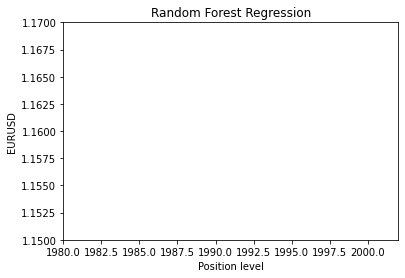

In [21]:
#for low prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(1980,2002)
plt.ylim(1.15,1.17)
plt.show()

In [22]:
#for high prediction
#select rows to use for x,y
x = eu.iloc[:,[4]].values
print(x)
y = eu.iloc[:,[8]].values
print(y)

[[1.37812]
 [1.37491]
 [1.38723]
 ...
 [1.1462 ]
 [1.14638]
 [1.13855]]
[[1.37491]
 [1.38723]
 [1.39146]
 ...
 [1.14638]
 [1.13855]
 [1.13321]]


In [23]:
#for high prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [24]:
#for high prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 4000, n_jobs=-1, criterion='mse',random_state=3)
#regressor = RandomForestRegressor(n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=4000, n_jobs=-1,
                      random_state=3)

In [25]:
#for high prediction
y_pred = regressor.predict(X_test)
#mape = mean_absolute_percentage_error(y_test,y_pred)

In [26]:
#for high regression score
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('MAPE:', mape)
print('MedAE', metrics.median_absolute_error(y_test,y_pred)) 
#print('MdAPE', metrics)

MAE: 0.004701632808884787
MSE: 4.2461636356326065e-05
RMSE: 0.006516259383751238
MedAE 0.0034985081250080707


In [27]:
#Add current high price into np.array()

In [28]:
#for high prediction
y_pred_h = regressor.predict(np.array([1.13317]).reshape(1, 1)) # test the output by changing values
y_pred_h

array([1.13266768])

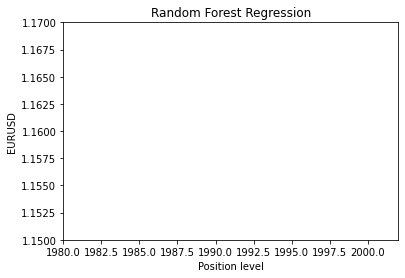

In [29]:
#for high prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, regressor.predict(X_grid),
		color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(1980,2002)
plt.ylim(1.15,1.17)
plt.show()

In [30]:
print(y_pred_h)
print(y_pred_c)
print(y_pred_l)

[1.13266768]
[1.13238274]
[1.12750367]


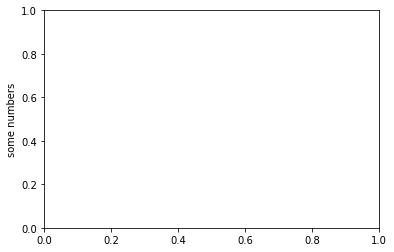

In [31]:
import matplotlib.pyplot as plt 
plt.ylabel('some numbers')
plt.show()